# Project 4 - Twitter Sentiment Analysis

#### 1. First we collect the text data using the Twitter-API
#### 2. So we will require few packages as follows:

In [77]:
import numpy  as np
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler

In [78]:
# Confidential API keys

consumer_key        = "CONFIDENTIAL_KEY"
consumer_secret     = "CONFIDENTIAL_KEY"
access_token        = "CONFIDENTIAL_KEY"
access_token_secret = "CONFIDENTIAL_KEY"

In [79]:
# calling the API

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [80]:
# getting the data from twitter using the API

query = "farmer protest in delhi"

In [81]:
Tweets = api.search(query, count=10, lang='en', exclude='retweets', tweet_mode='extended')

for tweet in Tweets:
    print(tweet,"\n----------------------------------------------------\n\n")

Status(_api=<tweepy.api.API object at 0x0000024F5F2797C8>, _json={'created_at': 'Sat Dec 26 18:36:03 +0000 2020', 'id': 1342902008525688832, 'id_str': '1342902008525688832', 'full_text': 'Dr. Shrinidhi is going live today morning from farmer protest site @ delhi border. He is in the team which provides medical help since last one week at protest site. #farmersprotest #FarmersProtest #FarmLaws #livefromprotestsite #delhi https://t.co/498xG86eo4', 'truncated': False, 'display_text_range': [0, 235], 'entities': {'hashtags': [{'text': 'farmersprotest', 'indices': [166, 181]}, {'text': 'FarmersProtest', 'indices': [182, 197]}, {'text': 'FarmLaws', 'indices': [198, 207]}, {'text': 'livefromprotestsite', 'indices': [208, 228]}, {'text': 'delhi', 'indices': [229, 235]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1342902005237366786, 'id_str': '1342902005237366786', 'indices': [236, 259], 'media_url': 'http://pbs.twimg.com/media/EqLyQj5VQAIeV-2.jpg', 'media_url_https': 'h

In [91]:
# Creating a strutured dataframe to store the dataset

df = pd.DataFrame(columns=['Tweets', 'User', 'User_statuses_count', 'user_followers', 'User_location', 'User_verified', 'fav_count', 'rt_count', 'tweet_date'])
df

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date


In [92]:
# function to create a dataset file 

# to exclude retweets and include extended tweet msgs refer: https://vinaysit.com/2019/02/28/tweepy-twitter-of-python/

def stream(data, file_name):
    i=0
    for tweet in tweepy.Cursor(api.search, q=data+' -filter:retweets', count=100, lang='en', tweet_mode='extended').items():
        print(i, end='\r')
        df.loc[i, 'Tweets']              = tweet.full_text
        df.loc[i, 'User']                = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers']      = tweet.user.followers_count
        df.loc[i, 'User_location']       = tweet.user.location
        df.loc[i, 'User_verified']       = tweet.user.verified
        df.loc[i, 'fav_count']           = tweet.favorite_count
        df.loc[i, 'rt_count']            = tweet.retweet_count
        df.loc[i, 'tweet_date']          = tweet.created_at
        
        # Storing the data in to an excel file
        df.to_excel('{}.xlsx'.format(file_name))
        i=i+1
        if(i == 1000):
            break
        else:
            pass
        

In [95]:
stream(data='farmer protest', file_name='tweets_dataset')

In [96]:
df

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,Sun lo #GodiMedia farmer protest nu funding ki...,Jas,238,4,,False,0,0,2020-12-26 20:30:05
1,Harnek Singh Neki Attacked | It's Not A Farmer...,Ajay,1931,240,,False,0,0,2020-12-26 20:28:27
2,Harnek Singh Neki Attacked | It's Not A Farmer...,Vinay Teja Reddy,1944,10,,False,0,0,2020-12-26 20:24:45
3,@KnowTheReason81 @diljitdosanjh If you think p...,Amar Atwal,92,12,,False,0,0,2020-12-26 20:23:35
4,@BorisJohnson I am Not Farmer but Help the Mil...,Balvinder Singh,9,0,,False,0,0,2020-12-26 20:21:57
...,...,...,...,...,...,...,...,...,...
995,@sammerpax @Mishra_jiiiii @liberal_slayerr Del...,Abhinav Garg,2983,82,,False,0,0,2020-12-25 18:37:52
996,@ganpat_hande @PunYaab Ask yourself if you ans...,पागल वैज्ञानिक 😨,13556,231,पागलखाना,False,0,0,2020-12-25 18:37:50
997,What leader talks like that!? This is not a ba...,Saheb Singh,144,3,,False,5,3,2020-12-25 18:35:59
998,@Simsandhu3 @AamAadmiParty @RahulGandhi Singhu...,simplybesthere,412,15,,False,0,0,2020-12-25 18:33:52


In [104]:
# importing textblob for analysis

from textblob import TextBlob

In [109]:
# function for Cleaning the tweet-text

import re

def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [110]:
# function for applying analysis on each tweet 

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [113]:
# applying cleaning function on the 'Tweets' column

df['clean_tweet']=df['Tweets'].apply(lambda x : clean_tweet(x))

In [114]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet
0,Sun lo #GodiMedia farmer protest nu funding ki...,Jas,238,4,,False,0,0,2020-12-26 20:30:05,Sun lo GodiMedia farmer protest nu funding kit...
1,Harnek Singh Neki Attacked | It's Not A Farmer...,Ajay,1931,240,,False,0,0,2020-12-26 20:28:27,Harnek Singh Neki Attacked It s Not A Farmer P...
2,Harnek Singh Neki Attacked | It's Not A Farmer...,Vinay Teja Reddy,1944,10,,False,0,0,2020-12-26 20:24:45,Harnek Singh Neki Attacked It s Not A Farmer P...
3,@KnowTheReason81 @diljitdosanjh If you think p...,Amar Atwal,92,12,,False,0,0,2020-12-26 20:23:35,If you think protest is instigated by middle m...
4,@BorisJohnson I am Not Farmer but Help the Mil...,Balvinder Singh,9,0,,False,0,0,2020-12-26 20:21:57,I am Not Farmer but Help the Millions of Farme...


In [115]:
# applying the sentiment analysis function on 'clean_tweet' column

df['sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x))

In [116]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet,sentiment
0,Sun lo #GodiMedia farmer protest nu funding ki...,Jas,238,4,,False,0,0,2020-12-26 20:30:05,Sun lo GodiMedia farmer protest nu funding kit...,Neutral
1,Harnek Singh Neki Attacked | It's Not A Farmer...,Ajay,1931,240,,False,0,0,2020-12-26 20:28:27,Harnek Singh Neki Attacked It s Not A Farmer P...,Neutral
2,Harnek Singh Neki Attacked | It's Not A Farmer...,Vinay Teja Reddy,1944,10,,False,0,0,2020-12-26 20:24:45,Harnek Singh Neki Attacked It s Not A Farmer P...,Neutral
3,@KnowTheReason81 @diljitdosanjh If you think p...,Amar Atwal,92,12,,False,0,0,2020-12-26 20:23:35,If you think protest is instigated by middle m...,Negative
4,@BorisJohnson I am Not Farmer but Help the Mil...,Balvinder Singh,9,0,,False,0,0,2020-12-26 20:21:57,I am Not Farmer but Help the Millions of Farme...,Positive


In [119]:
def compare_tweet_sentiment(n):
    print("Original tweet:\n",df['Tweets'][n])
    print()
    print("Clean tweet:\n",df['clean_tweet'][n])
    print()
    print("Sentiment of the tweet:\n",df['sentiment'][n])

In [120]:
compare_tweet_sentiment(20)

Original tweet:
 @ANI There is no requirements of yadav in farmer protest https://t.co/rK3HLRlG37

Clean tweet:
 There is no requirements of yadav in farmer protest

Sentiment of the tweet:
 Neutral


In [121]:
compare_tweet_sentiment(35)

Original tweet:
 Farmer Protest 
India 

https://t.co/ESWJMpaXGp

Clean tweet:
 Farmer Protest India

Sentiment of the tweet:
 Neutral


In [122]:
compare_tweet_sentiment(99)

Original tweet:
 @mnishant2 @5Forty3 As one Farmer leader said on Tv.. The opposition strength is just 40-45 MPs .. how is it that govt believe them to b soo powerful that all protest are sponsored n maintained by them ......

Clean tweet:
 As one Farmer leader said on Tv The opposition strength is just 40 45 MPs how is it that govt believe them to b soo powerful that all protest are sponsored n maintained by them

Sentiment of the tweet:
 Positive


In [123]:
compare_tweet_sentiment(376)

Original tweet:
 This is reality of all of India. That’s why it’s a 2 state farmer protest and not all 15 cr farmer protest. https://t.co/f4ORQdduxT

Clean tweet:
 This is reality of all of India That s why it s a 2 state farmer protest and not all 15 cr farmer protest

Sentiment of the tweet:
 Neutral


In [126]:
compare_tweet_sentiment(896)

Original tweet:
 @BRajewal Farmer protest's stalemate need to be broken by daily attempting to proceed into Delhi for keeping central government on its toes. Otherwise, government won't be forced to back down.

Clean tweet:
 Farmer protest s stalemate need to be broken by daily attempting to proceed into Delhi for keeping central government on its toes Otherwise government won t be forced to back down

Sentiment of the tweet:
 Negative


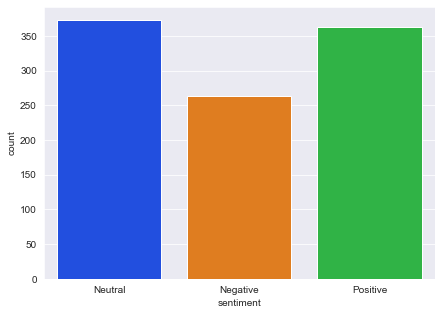

In [152]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.countplot(x='sentiment',data=df, palette ='bright');

### So it looks like a lot of people are neutral but there are also alot of positive support for farmer protest according to the twitter data analysis. 